In [2]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


# Imputation
## Basic Techniques

In [3]:
# numerical - mean - normally distributed data
imputer = SimpleImputer(strategy="mean")

# numerical - median - skewed distribution, works better
imputer = SimpleImputer(strategy="median")

# mode
imputer = SimpleImputer(strategy="most_frequent")

# arbitrary
imputerA = SimpleImputer(strategy="contant", fill_value=999)
imputerB = SimpleImputer(strategy="contant", fill_value="Unavailable")

**When to use**
</br>

- data is missing at random (no meaning behind the blank)
- missing data would look like most of your observations (they're not outliers)

**Pros**
</br>

- Fast (fewer resources)
- Easy to apply
- Can be used in production pipelines for easy implementations

**Cons**
</br>

- Possibility of distorting the data distrbution. The more missing values you have the higher the chance of impacting your data distribution.
- It only works on a column level. It doesn't factor in the relationship between features.
- Mean and median only works on numerical features

### Numerical

### Using Sklearn
- Sometimes faster
- Already have functionality where you might be using sklearn down the data road

In [4]:
# Build the imputer function
imputer = SimpleImputer(strategy="mean")

# Convert to numpy array and reshape to vertical
df['Score'] = imputer.fit_transform(df['Score'].values.reshape(-1, 1))

df['Score'].mean()

38.2

### Using pandas

In [5]:
# Sometimes the mean is tricky and the overall average gets messed up
# if you use on a column with null values
# use skipna=True to use mean without the null values
df['Score'].fillna(df['Score'].mean(skipna=True), inplace=True)

### Categorical

In [6]:
# in case you have 'None' instead of NaN, use missing_values = 'None', missing_values = ' ', missing_values = 'whatever
imputer_cat = SimpleImputer(strategy='most_frequent')

# Pandas
# df['University'].fillna(df['University'].mode(skipna=True), inplace=True)

df['University'] = imputer_cat.fit_transform(df['University'].values.reshape(-1, 1))[:,0] # grab all the rows but only first column
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


### Dropping Values

**When to use**
</br>

- data is missing at random
- missing values represent a small portion of the overall data (1-2%)

**Pros**
</br>

- Easy to apply
- No data manipulation required
- Preserves distribution

**Cons**
</br>

- Information loss: a lot of data observations can be discarded if the ratio of nulls is high
- Can create a biased dataset because you might drop elements with valuable info
- Might distort the distribution of other columns that have values in the same dropped rows

In [7]:
students = {
    'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
    'Score' : [40, np.NaN, 44, np.NaN, 26, 39, 42, np.NaN],
    'University' : ['UTC', np.NaN, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
}

drop_df = pd.DataFrame(students)

# customize dropping
drop_df.dropna(thresh=2, inplace=True)
drop_df

,Name,Score,University
0,Mark,40.0,UTC
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


## Advanced Techniques

### KNN: K-Nearest Neighbor
- a clustering alorithm that is used for simple classification
- uses feature similarity to determine the appropriate value of NaN

**Pros**
</br>

- Unlike classic techniques, looks into the underlying factors between neighboring features


In [8]:
X = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
X

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [9]:
from sklearn.impute import KNNImputer

# How many neighbors to include. Start with smaller numbers first
imputer_KNN = KNNImputer(n_neighbors=2)

# Only works with numerical values. Cat values would need to be encoded
imputer_KNN.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

### Linear Interpolation

# Outlier Treatment

Boston house prices dataset
---------------------------
**Data Set Characteristics:**
Number of Instances: 506
Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

```
:Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
```

In [10]:
boston_df = pd.read_csv('../data-wrangling/boston_sklearn.csv')
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# magic function
%matplotlib inline

<Axes: >

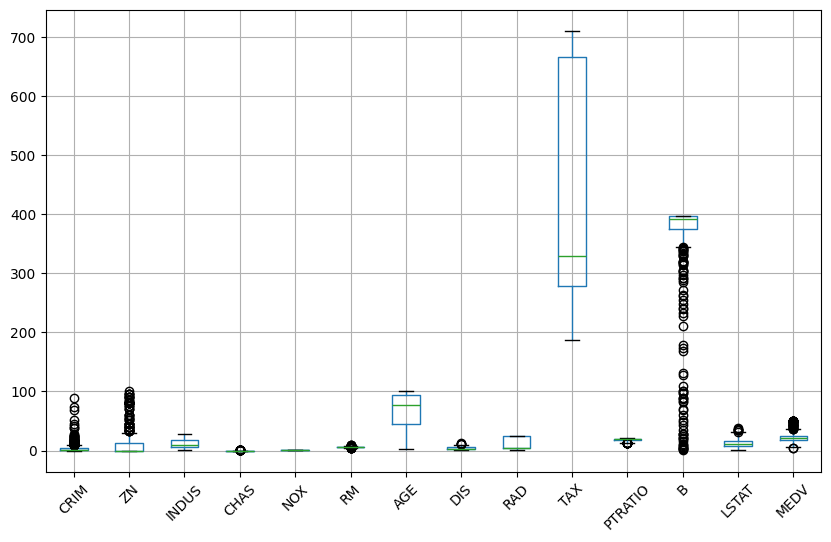

In [13]:
boston_df.boxplot(rot=45, figsize=(10,6))

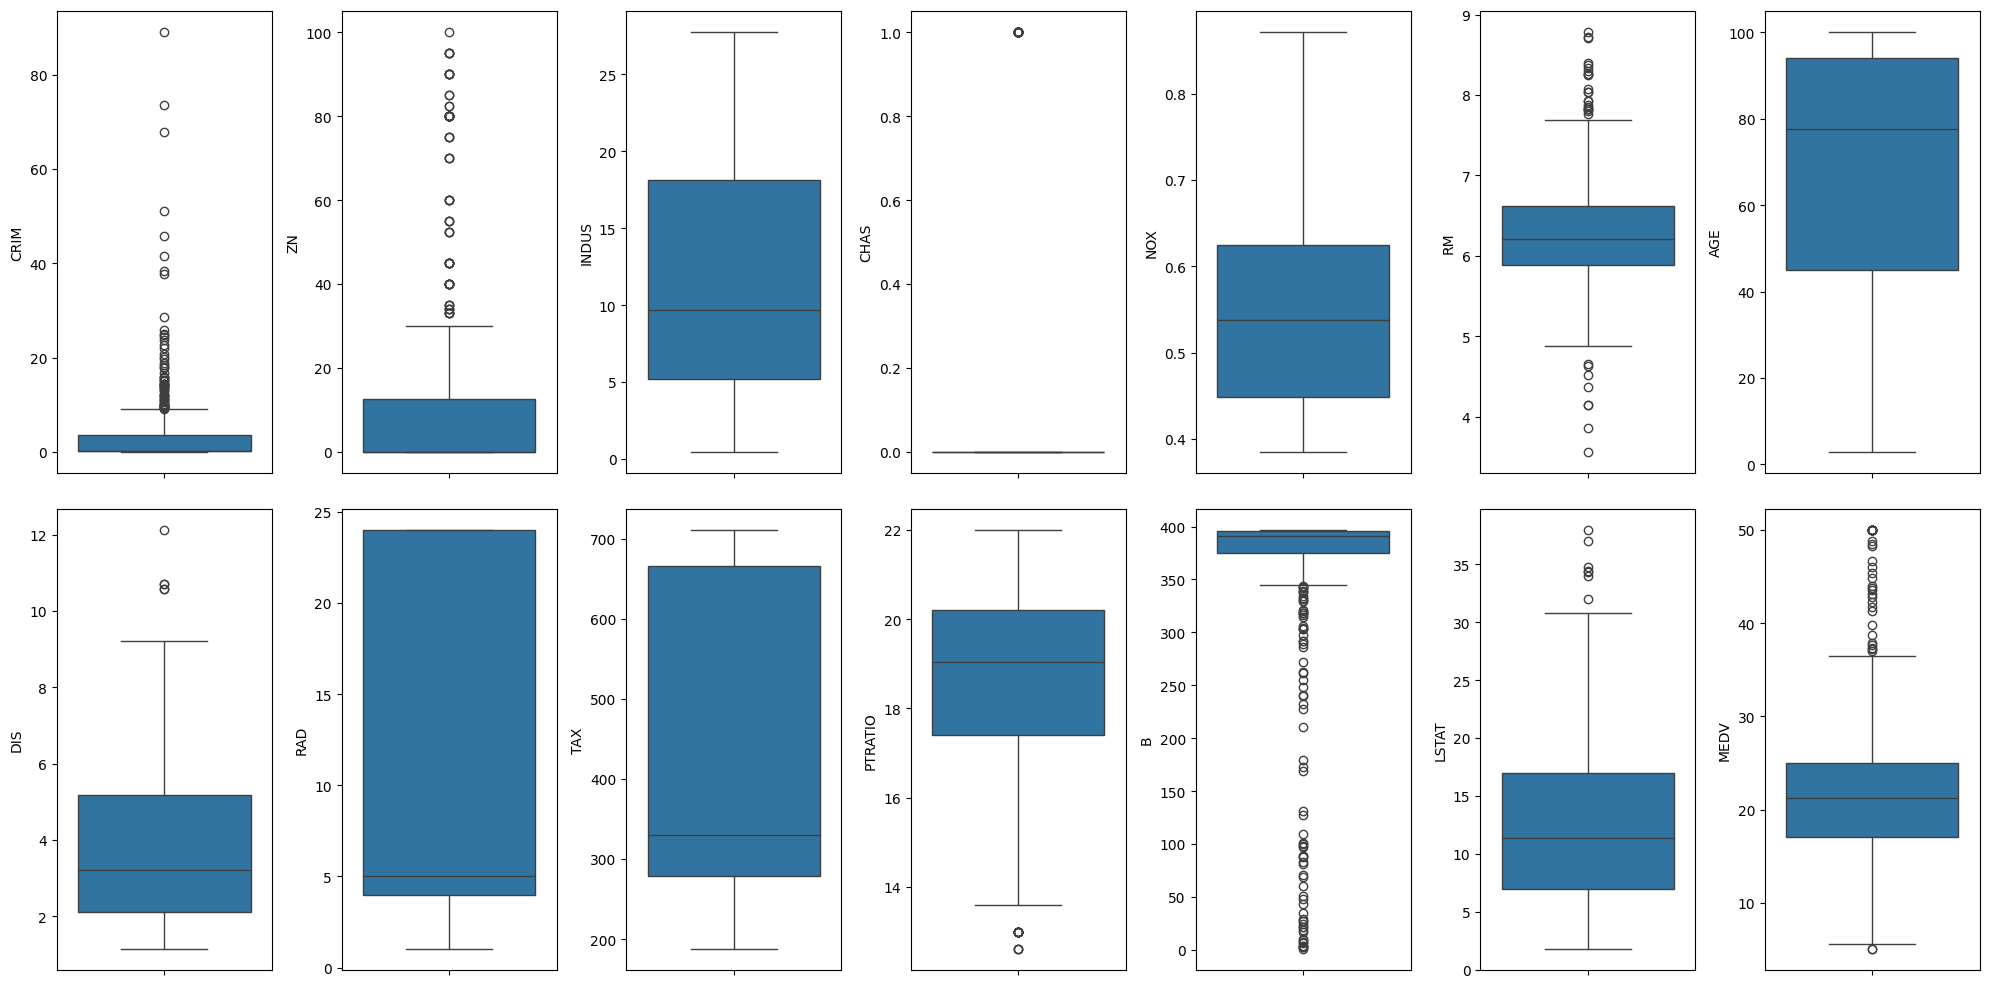

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))

index = 0
axs = axs.flatten()

for key,value in boston_df.items():
  sns.boxplot(y=key, data=boston_df, ax=axs[index])
  # sns.histplot(value, ax=axs[index], kde=True)
  index += 1

plt.tight_layout(h_pad=2,w_pad=1)

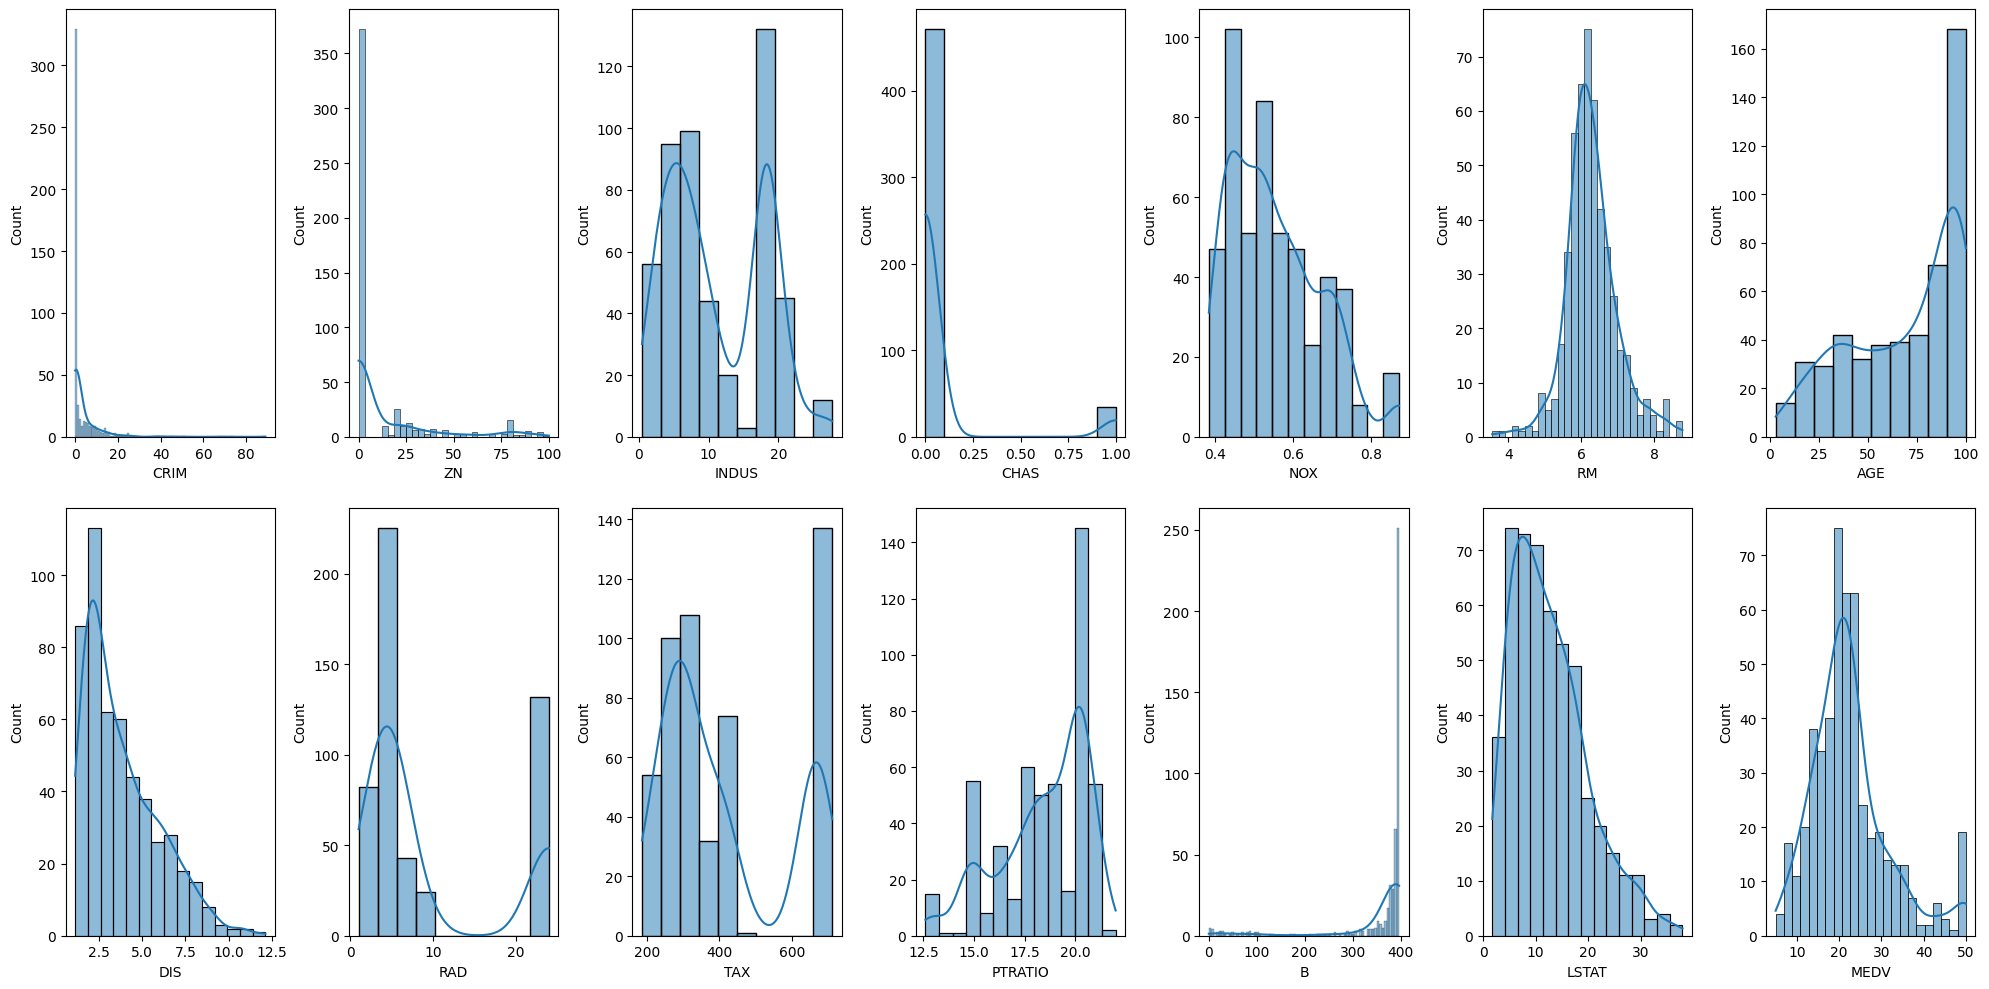

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20,10))

index = 0
axs = axs.flatten()

for key,value in boston_df.items():
  # sns.boxplot(y=key, data=boston_df, ax=axs[index])
  sns.histplot(value, ax=axs[index], kde=True)
  index += 1

plt.tight_layout(h_pad=2,w_pad=1)

- Multiple columns are heavily skewed
- MEDV (target) has low and high outliers
- We can apply outlier treatment to MEDV

![IQR](https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

#### Method 1: InnerQuartile Range
- Outside whiskers are outliers
- Use statistical formulas to get rid of outliers

Build a function that uses IQR formulas to capture outlier limits
  - Q1 represents 25th percentile of the data
  - Q3 represents 75th percentile of the data

In [16]:
def outlier_treatment(col):
  # Get Q1, Q3 percentiles
  Q1, Q3 = np.percentile(col, [25, 75])
  IQR = Q3 - Q1

  # define upper, lower ranges
  lower_range = Q1 - 1.5 * IQR
  upper_range = Q3 + 1.5 * IQR

  return lower_range, upper_range

In [17]:
lower_range, upper_range = outlier_treatment(boston_df['MEDV'])
print(lower_range, upper_range)

5.0624999999999964 36.962500000000006


<Axes: >

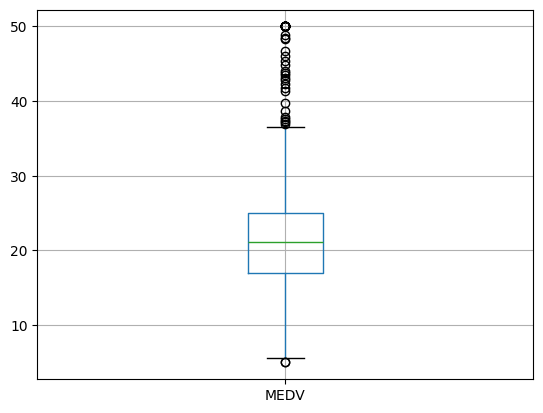

In [18]:
boston_df[['MEDV']].boxplot()

In [19]:
# lower range condition
medv_keep = (boston_df['MEDV'] > lower_range) & (boston_df['MEDV'] < upper_range)
df_outlier_treatment = boston_df[medv_keep]

(466, 14)

In [20]:
print('size before outlier treatment: ', boston_df.shape)
print('size after outlier treatment: ', df_outlier_treatment.shape)

size before outlier treatment:  (506, 14)
size after outlier treatment:  (466, 14)


Text(0.5, 1.0, 'After Outlier Treatment')

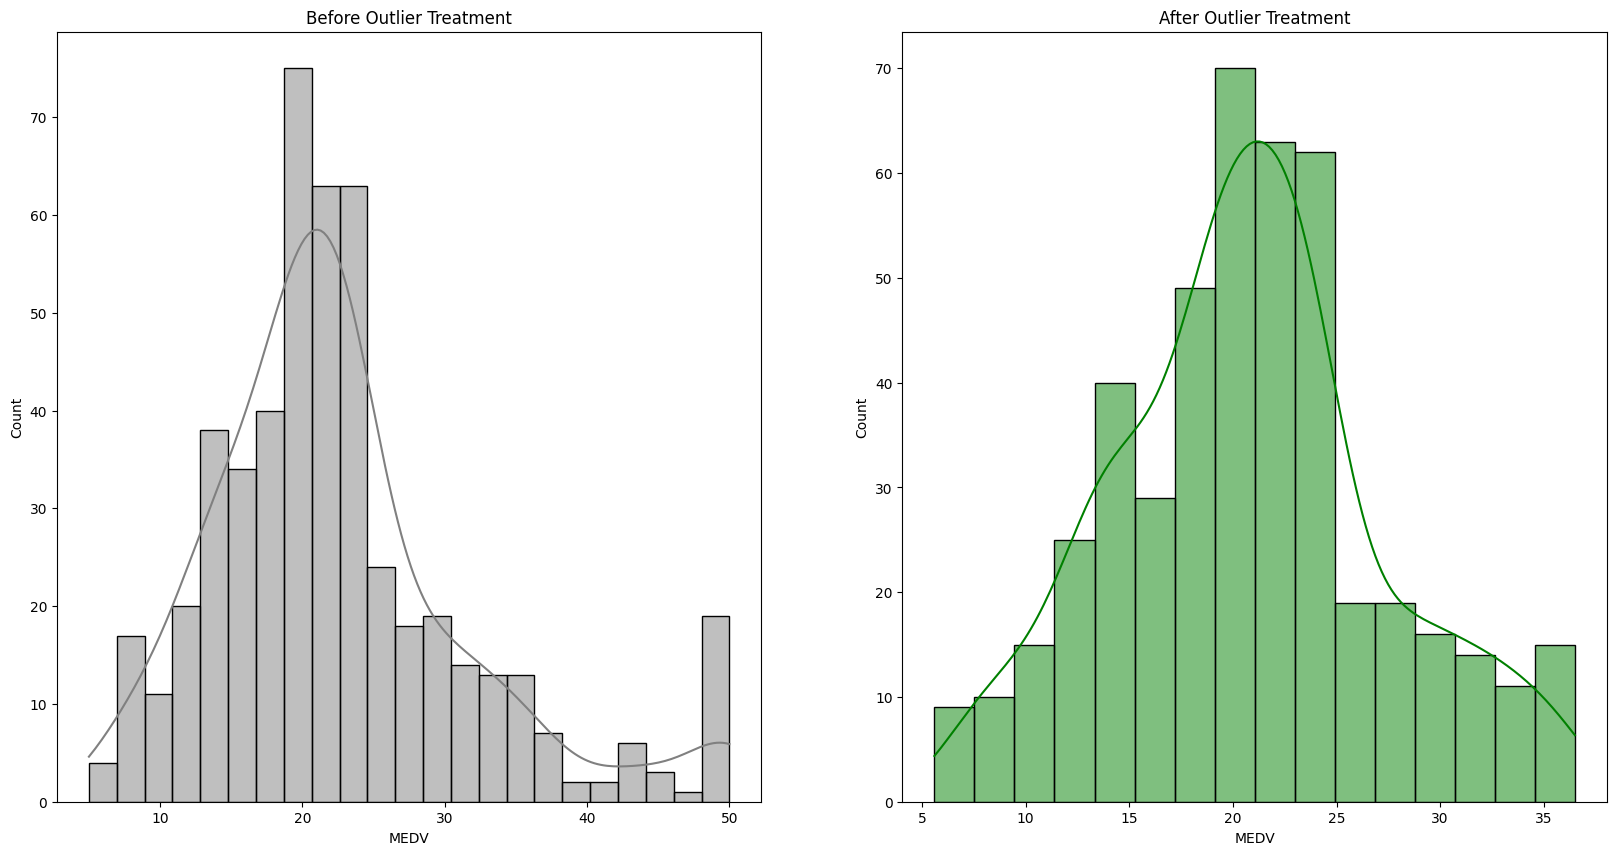

In [24]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
sns.histplot(boston_df['MEDV'], kde=True, color="grey", ax=axs[0])
sns.histplot(df_outlier_treatment['MEDV'], kde=True, color="green", ax=axs[1])

axs[0].set_title('Before Outlier Treatment')
axs[1].set_title('After Outlier Treatment')

Text(0.5, 1.0, 'After Outlier Treatment')

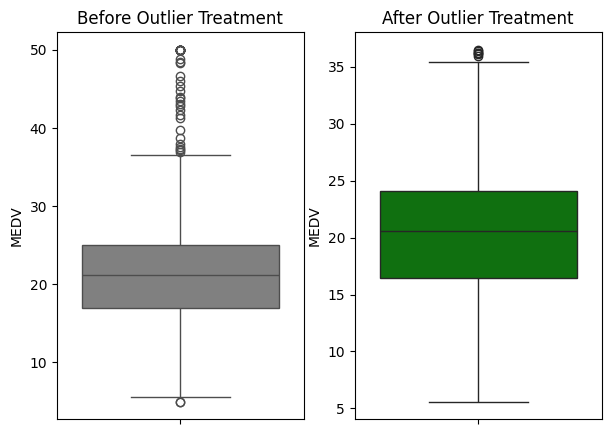

In [37]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(6,4))
sns.boxplot(y=boston_df['MEDV'], color="grey", ax=axs[0])
sns.boxplot(y=df_outlier_treatment['MEDV'], color="green", ax=axs[1])

plt.tight_layout(pad=0.3)

axs[0].set_title('Before Outlier Treatment')
axs[1].set_title('After Outlier Treatment')

- Looks like our outlier treatment did a good job of making the distribution for MEDV as symmetrical as possible.
- We need to check if dropping outliers negatively impacted the distribution of the rest of the columns

Check before/after skew of other columns!

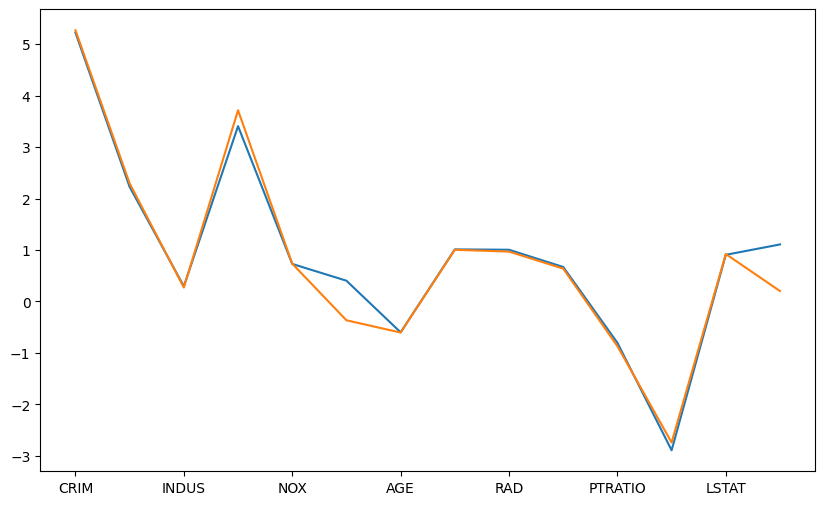

In [42]:
skew_before = boston_df.skew().plot(figsize=(10, 6))
skew_after = df_outlier_treatment.skew().plot()



It's safe to say that there's no negative impact on the data distribution after removing MEDV outliers

#### Method 2: Z-Score


In [51]:
from scipy.stats import zscore

df_housing = pd.read_csv('./HousePrices.csv')
df_housing.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

1. Convert price into a z-score format
2. Filter on 

In [52]:
df_housing['zscore-price'] = zscore(df_housing['price'])
df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zscore-price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482


In [55]:
# Define a threshold
threshold = 2

# Define column with outlier T/F
# where(first cond, value if true, value if false)
df_housing["outliers"] = np.where(
    df_housing["zscore-price"] - threshold > 0,  # first condition: positive values
    True,  # is outlier
    np.where(
        df_housing["zscore-price"] + threshold < 0,
        True,  # second condition: negative values
        False, # neither condition is met so is NOT an outlier
    ),
)

df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zscore-price,outliers
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False


In [57]:
# Get rows with outliers
len(df_housing[df_housing['outliers'] == True])

87

In [58]:
df_house_outlier_treatment = df_housing[df_housing['outliers'] == False]
df_house_outlier_treatment.shape

(4513, 20)

Text(0.5, 1.0, 'After Outlier Treatment')

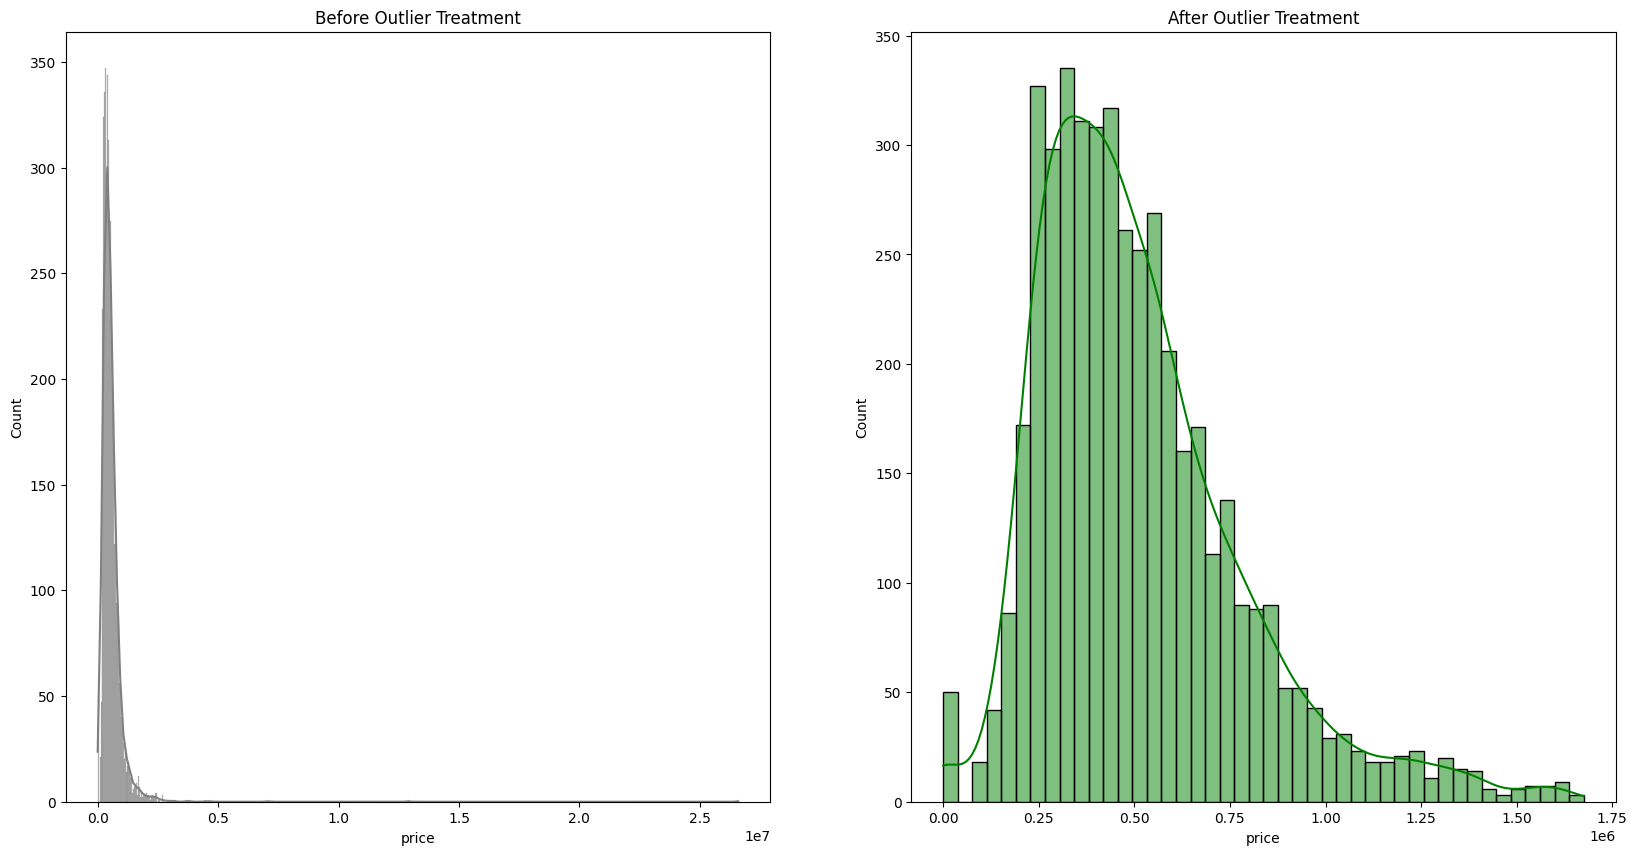

In [59]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
sns.histplot(df_housing['price'], kde=True, color="grey", ax=axs[0])
sns.histplot(df_house_outlier_treatment['price'], kde=True, color="green", ax=axs[1])

axs[0].set_title('Before Outlier Treatment')
axs[1].set_title('After Outlier Treatment')

In [60]:
# Additional technique - quick and easy way using percentiles

# instead of 25, 75 use 5th, 95th percentile
low_range, up_range = np.percentile(df_housing['price'], [5, 95])

# Use filters to drop below lower and above upper
print(low_range, up_range)

200000.0 1184050.0000000002


# Binning Operations

- Data binning (bucketing) is a technique used in preprocessing and feature engineering.
- It's a type of feature extraction
- Works on continuous, numerical data (no categorical data)

**Advantages**

- Simplifies the complexity of the data
- Provides better EDA
- Improves the ML model performance

<Axes: >

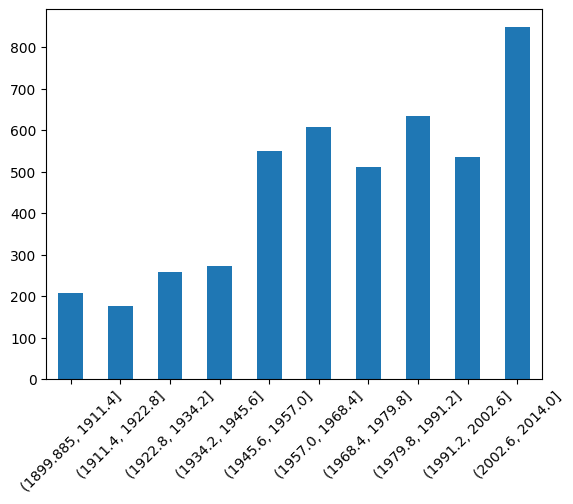

In [65]:
df_housing['yr_built'].value_counts(bins=10, sort=False).plot(kind="bar", rot=45)

In [66]:
pd.cut(df_housing['yr_built'], 10)

0       (1945.6, 1957.0]
1       (1911.4, 1922.8]
2       (1957.0, 1968.4]
3       (1957.0, 1968.4]
4       (1968.4, 1979.8]
              ...       
4595    (1945.6, 1957.0]
4596    (1979.8, 1991.2]
4597    (2002.6, 2014.0]
4598    (1968.4, 1979.8]
4599    (1979.8, 1991.2]
Name: yr_built, Length: 4600, dtype: category
Categories (10, interval[float64, right]): [(1899.886, 1911.4] < (1911.4, 1922.8] < (1922.8, 1934.2] < (1934.2, 1945.6] ... (1968.4, 1979.8] < (1979.8, 1991.2] < (1991.2, 2002.6] < (2002.6, 2014.0]]

In [70]:
# Using meaningful labels for the ranges
df_housing['house_age'] = pd.cut(df_housing['yr_built'], 3, labels=['very old', 'old', 'new'])
df_housing.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,zscore-price,outliers,house_age
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False,old
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True,very old
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False,old
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False,old
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False,old
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,...,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,-0.109908,False,very old
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,...,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,-0.384841,False,old
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,...,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,-0.124098,False,new
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,...,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,-0.176424,False,new
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,...,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,0.156157,False,old


<Axes: xlabel='price', ylabel='house_age'>

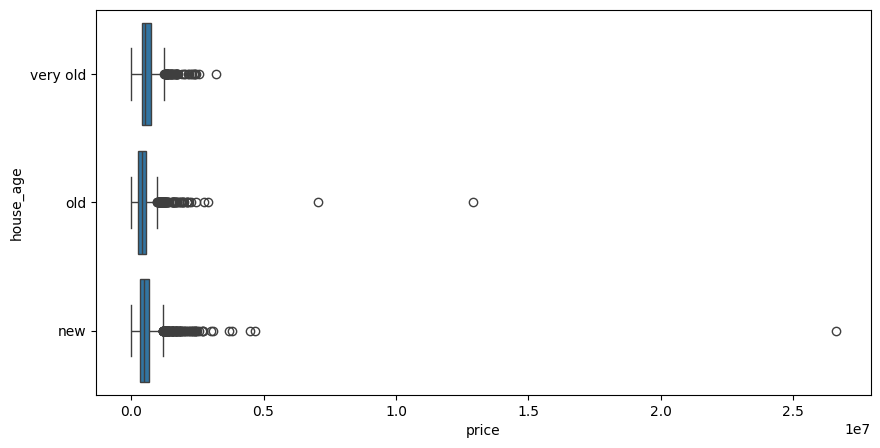

In [72]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_housing['price'], y=df_housing['house_age'])

# Encoding

- The process of converting categorical (text) features into numerical
- Encoding is essential for ML algorithms to work

**Nominal Variables**

- Nominal categorical variables (e.g. red, blue, green, etc.)
- There's no relationship, association, or order to the categories

**Ordinal Variables**

- Ordinal categorical variables have a order (ordinal relationship) between different categories
- e.g. education level: primary school < secondary school < graduate < post graduate
- Conversion must follow and maintain an order (0, 1, 2, 3, 4) so as not to lose any value the feature provides

**Interval Variables**

- Ranges (bins)
- e.g. salary range (e.g. 20k-40k <  41k-50k)
- range AND order

## Label Encoding

### Using Pandas

In [ ]:
# Using Pandas (Map)
df_housing["house_age"] = df_housing["house_age"].map(
    {"very old": 0, "old": 1, "new": 2}
)

### Using SK Learn LabelEncoder

In [110]:
iris_df = pd.read_csv('./Iris.csv')
iris_df.sample(10)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [77]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [78]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [82]:
iris_df['species'] = LE.fit_transform(iris_df['species'])
iris_df['species'].unique()

array([0, 1, 2])

## One Hot Encoder

### SK Learn

In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets
import numpy as np

OHE = OneHotEncoder(categories='auto')

In [93]:
iris_data = datasets.load_iris()
iris_data.data
iris_data.feature_names
iris_data.target
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
# Build dataframe out of sklearn data
# Concatenate data (features) with target
iris_dataframe = pd.DataFrame(
    data=np.c_[iris_data.data, iris_data.target],
    columns=iris_data.feature_names + ["target"],
)
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [104]:
# iris_dataframe['target'] = 
y = OHE.fit_transform(iris_dataframe['target'].values.reshape(-1, 1))

In [105]:
y.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### Pandas

In [114]:
# pd.get_dummies(iris_dataframe['target'], dtype=int)
pd.get_dummies(iris_df, dtype=int, columns=['species'])
# iris_df.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1
